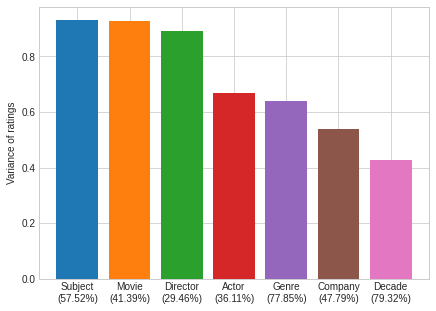

In [1]:
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.linewidth'] = 0.8
plt.style.use('seaborn-whitegrid')

group_ratings = defaultdict(list)
group_known = defaultdict(list)

fig, ax = plt.subplots(figsize=(7, 5))

base_path = '../../../debug/sources/'
uri_label = dict()
entities = pd.read_csv(f'{base_path}/entities.csv')
entities.labels = entities.labels.str.split('|')
ratings = pd.read_csv(f'{base_path}/ratings.csv')
#ratings = ratings[ratings.sentiment != 0]

for idx, entity in entities.iterrows():
    uri_label[entity.uri] = entity.labels[-1]

for idx, rating in ratings.iterrows():
    label = uri_label[rating.uri]
    if rating.sentiment:
        group_ratings[label].append(rating.sentiment)
        
    group_known[label].append(bool(rating.sentiment))

group_ratings = {k: np.var(v) for k, v in group_ratings.items()}
groups = sorted(group_ratings, key=group_ratings.get, reverse=True)

for idx, group in enumerate(groups):
    plt.bar(f'{group}\n({np.mean(group_known.get(group)) * 100:.2f}%)', group_ratings.get(group))

plt.ylabel('Variance of ratings')
plt.savefig('entity_variance.pdf', bbox_inches='tight')
plt.show()